# Building and flashing firmware

## Conneecting to hardware

In [104]:
import chipwhisperer as cw
scope = cw.scope()

USBErrorBusy: LIBUSB_ERROR_BUSY [-6]

In [105]:
scope

cwlite Device
sn         = 50203220343043543030323238313032
fw_version = 
    major = 0
    minor = 64
    debug = 0
gain = 
    mode = low
    gain = 0
    db   = 5.5
adc = 
    state          = False
    basic_mode     = low
    timeout        = 2
    offset         = 0
    presamples     = 0
    samples        = 24400
    decimate       = 1
    trig_count     = 319195109
    fifo_fill_mode = normal
clock = 
    adc_src       = clkgen_x1
    adc_phase     = 0
    adc_freq      = 96000000
    adc_rate      = 96000000.0
    adc_locked    = True
    freq_ctr      = 0
    freq_ctr_src  = extclk
    clkgen_src    = system
    extclk_freq   = 10000000
    clkgen_mul    = 2
    clkgen_div    = 1
    clkgen_freq   = 192000000.0
    clkgen_locked = True
trigger = 
    triggers = tio4
    module   = basic
io = 
    tio1         = serial_tx
    tio2         = serial_rx
    tio3         = high_z
    tio4         = high_z
    pdid         = high_z
    pdic         = high_z
    nrst         = high

In [106]:
target = cw.target(scope, cw.targets.SimpleSerial) #cw.targets.SimpleSerial can be omitted

In [107]:
target

SimpleSerial Settings =
	output_len             = 16
	baud                   = 38400
	simpleserial_last_read = 
	simpleserial_last_sent = 
	

In [108]:
# Using default setup for the scope
scope.default_setup()

## First test with an ChipWhisperer's firmware

### Flashing the firmware

In [6]:
%%bash
cd ../../chipwhisperer/hardware/victims/firmware/simpleserial-base/
pwd
make PLATFORM=CW303 CRYPTO_TARGET=NONE

/home/etienne/Documents/Ecole/ENSIBS/PEI-2/ProjetPluri/chipwhisperer/hardware/victims/firmware/simpleserial-base
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
avr-gcc (GCC) 13.2.0
Copyright (C) 2023 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
    simpleserial-base.c ...Done!
.
Compiling:
    .././simpleserial/simpleserial.c ...Done!
.
Compiling:
    .././hal/xmega/XMEGA_AES_driver.c ...Done!
.
Compiling:


In file included from .././hal/xmega/uart.h:2,
                 from .././hal/xmega/uart.c:1:
.././hal/xmega/uart.c: In function 'init_uart0':
.././hal/xmega/usart_driver.h:130:17: warning: array subscript 0 is outside array bounds of 'USART_t[0]' {aka 'struct USART_struct[]'} [-Warray-bounds=]
  130 |         (_usart)->CTRLC = (uint8_t) _charSize | _parityMode |                      \
      |                 ^~
.././hal/xmega/uart.c:23:9: note: in expansion of macro 'USART_Format_Set'
   23 |         USART_Format_Set(&USART, USART_CHSIZE_8BIT_gc, USART_PMODE_DISABLED_gc, false);
      |         ^~~~~~~~~~~~~~~~
cc1: note: source object is likely at address zero
.././hal/xmega/usart_driver.h:157:17: warning: array subscript 0 is outside array bounds of 'USART_t[0]' {aka 'struct USART_struct[]'} [-Warray-bounds=]
  157 |         (_usart)->BAUDCTRLA =(uint8_t)_bselValue;                                           \
      |                 ^~
.././hal/xmega/uart.c:35:9: note: in expansion 

    .././hal/xmega/uart.c ...Done!
.
Compiling:
    .././hal/xmega/usart_driver.c ...Done!
.
Compiling:
    .././hal/xmega/xmega_hal.c ...Done!
.
LINKING:
    simpleserial-base-CW303.elf ...Done!
.
Creating load file for Flash: simpleserial-base-CW303.hex
avr-objcopy -O ihex -R .eeprom -R .fuse -R .lock -R .signature simpleserial-base-CW303.elf simpleserial-base-CW303.hex
.
Creating load file for Flash: simpleserial-base-CW303.bin
avr-objcopy -O binary -R .eeprom -R .fuse -R .lock -R .signature simpleserial-base-CW303.elf simpleserial-base-CW303.bin
.
Creating load file for EEPROM: simpleserial-base-CW303.eep
avr-objcopy -j .eeprom --set-section-flags=.eeprom="alloc,load" \
--change-section-lma .eeprom=0 --no-change-warnings -O ihex simpleserial-base-CW303.elf simpleserial-base-CW303.eep || exit 0
.
Creating Extended Listing: simpleserial-base-CW303.lss
avr-objdump -h -S -z simpleserial-base-CW303.elf > simpleserial-base-CW303.lss
.
Creating Symbol Table: simpleserial-base-CW303.sym
av

In [7]:
# Change the path according to the platofm you choosen
cw.program_target(scope, cw.programmers.XMEGAProgrammer, "../../chipwhisperer/hardware/victims/firmware/simpleserial-base/simpleserial-base-CW303.hex")

XMEGA Programming flash...
XMEGA Reading flash...
Verified flash OK, 2103 bytes


### Communication with the target (using the firmware)

In [8]:
msg = bytearray([1]*16) #simpleserial uses bytearrays
target.write('p126110475e17505a6966be70c89a829c\n \n ')
print(target.simpleserial_read('r', 16))

(ChipWhisperer Target WARNING|File SimpleSerial.py:410) Unexpected start to command: h


None


In [9]:
print(target.read())

475E17505A6966BE70C89A829C
z00



## With our own firmware


In [11]:
%%bash
cd ../src
make

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
avr-gcc (GCC) 13.2.0
Copyright (C) 2023 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:


simpleserial-homemade-rsa.c: In function 'main':
simpleserial-homemade-rsa.c:45:33: warning: passing argument 3 of 'simpleserial_addcmd' from incompatible pointer type [-Wincompatible-pointer-types]
   45 |     simpleserial_addcmd('g', 0, gen_key);
      |                                 ^~~~~~~
      |                                 |
      |                                 RsaKey (*)()
In file included from simpleserial-homemade-rsa.c:3:
../../chipwhisperer/hardware/victims/firmware/simpleserial/simpleserial.h:49:61: note: expected 'uint8_t (*)(uint8_t *, uint8_t)' {aka 'unsigned char (*)(unsigned char *, unsigned char)'} but argument is of type 'RsaKey (*)()'
   49 | int simpleserial_addcmd(char c, unsigned int len, uint8_t (*fp)(uint8_t*, uint8_t));
      |                                                   ~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~
simpleserial-homemade-rsa.c:50:33: error: 'get_d' undeclared (first use in this function)
   50 |     simpleserial_addcmd('d', 0, get_d);
      

    simpleserial-homemade-rsa.c ...

CalledProcessError: Command 'b'cd ../src\nmake\n'' returned non-zero exit status 2.

In [160]:
# Change the path according to your firmware name
cw.program_target(scope, cw.programmers.STM32FProgrammer, "../src/simpleserial-homemade-rsa-CW308_STM32F3.hex")

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 7919 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 7919 bytes


In [167]:
# Génération de clefs

target.write("g\n");
a = target.read()
print(a)

r6E3D32363939313137313720653D363532383020643D31373332373836323320703D31373332373836323320713D3136343131207068693D3136343437000000
z00



In [168]:
from struct import pack
exp = 0b1111111100000000
a = pack("<Q", exp)
len(a)
target.simpleserial_write('s', pack("<Q", exp))
print(target.read())

#target.simpleserial_write('s', pack("<Q", 0x1234))
#print("set d", target.simpleserial_wait_ack()) #should return 0
#target.simpleserial_write('s', b"")
#print("decrypt", target.simpleserial_wait_ack())  # should not be None
#print(target.simpleserial_read('r', 64))

In [169]:
# Affichage de `d`
target.write('a\n')
print(target.read())
print(target.simpleserial_read('r', 64))

r6E3D32363939313137313720653D363532383020643D31373332373836323320703D31373332373836323320713D3136343131207068693D3136343437000000
z00

bytearray(b'n=269911717 e=65280 d=173278623 p=173278623 q=16411 phi=16447\x00\x00\x00')


In [123]:
scope.adc.clk_freq = 9.75e10
# scope.adc.clk_freq
# scope.adc.samples

r63743D38343034
[ 0.0390625  -0.09863281 -0.06347656 ... -0.19921875 -0.07128906
 -0.00878906]


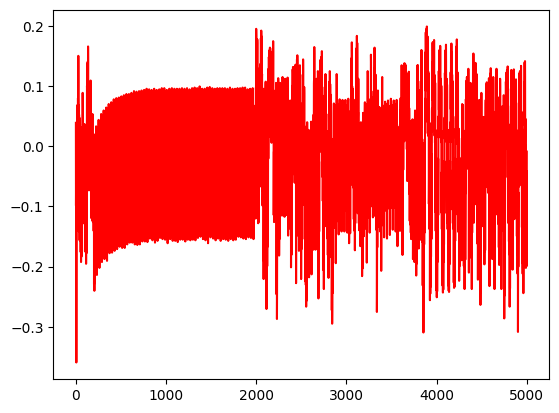

5000


In [124]:
# Encryption d'un plaintext
scope.arm()

target.write("e\n")
scope.capture()

print(target.read())
#print(target.simpleserial_read('r', 64))

res = scope.get_last_trace()

print(res)
import matplotlib.pylab as plt
plt.plot(res[:], 'r')
plt.show()

print(len(res))

# 0b10000000011110000

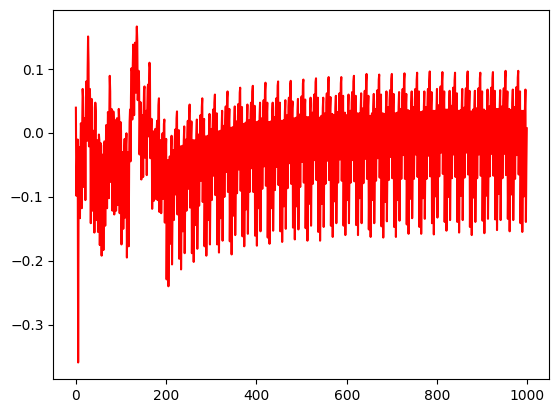

32768

In [125]:
plt.plot(res[0:1000], 'r')
plt.show()

0b1000000000000000

1000


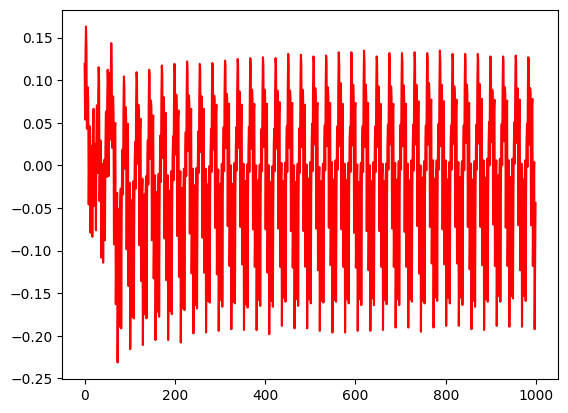

2000


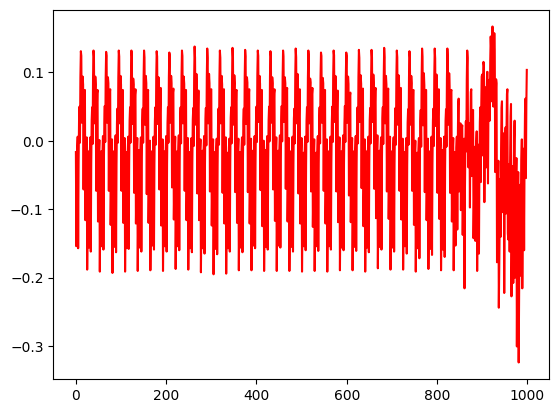

3000


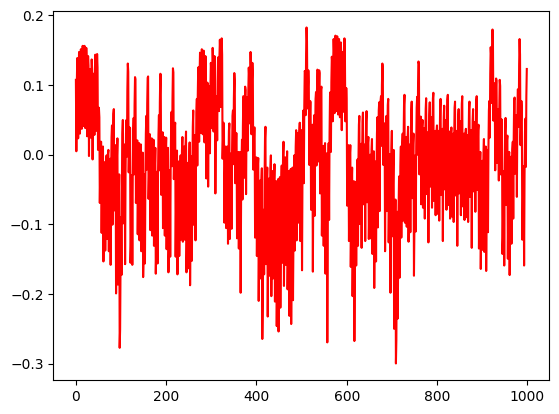

5000


In [42]:
begin = 5000
from time import sleep
for o in range(1000, len(res)-1000, 1000):
    plt.plot(res[o:o+1000], 'r')
    print(o)
    plt.show()
    sleep(2)
print(len(res))